In [1]:
using ProgressMeter
using JLD
using Random
using FlipPA
include("../alpcahus.jl")
include("../helperFunctions.jl")
include("../cluster.jl")

hungarianAlgorithm (generic function with 1 method)

In [2]:
D = 50 # ambient space dimension
d = 3 # subspace dimension
goodPoints = 6 # good points per subspace
ν1 = 0.1 # noise variance good points
K = 2 # subspace count
varianceRatio = 150 #range( 1,300,5) # variance ratio for heatmaps
pointRatio = 50 #range(1,50,5) # point ratio between good bad data for heatmaps
trials = 100; # smoother results
qValue = 24;

In [3]:
seedVector1 = rand(Xoshiro(1234), 1:100000, trials*length(varianceRatio)*length(pointRatio));
seedVector2 = rand(Xoshiro(4321), 1:100000, trials*length(varianceRatio)*length(pointRatio));
seedVector3 = rand(Xoshiro(2143), 1:100000, trials*length(varianceRatio)*length(pointRatio));
seedVector4 = rand(Xoshiro(3412), 1:100000, trials*length(varianceRatio)*length(pointRatio));

In [4]:
#ekssTensor = zeros(trials)
rankMatrix = zeros(2,trials)
alpcahTensor = zeros(trials)
rankMatrixTrue = zeros(2,trials)
alpcahTensorTrue = zeros(trials)
#oracleTensor = zeros(trials)

count = 1
for k = 1:trials
    # other parameters
    ν2 = varianceRatio*ν1
    badPoints = round(Int, pointRatio*goodPoints)
    # subspace generation
    U1 = generateSubspace(D, d; seed=seedVector1[count]) 
    U2 = generateSubspace(D, d; seed=seedVector2[count])
    # data generation
    X1 = generateData(U1, [ν1,ν2], [goodPoints,badPoints]; seed=seedVector3[count])
    X2 = generateData(U2, [ν1,ν2], [goodPoints,badPoints]; seed=seedVector4[count])
    # complete data matrix
    X = hcat(X1,X2);
    # cluster assignments
    C1 = vec([1*ones(size(X1)[2],1); 2*ones(size(X2)[2],1)]);
    C2 = vec([2*ones(size(X1)[2],1); 1*ones(size(X2)[2],1)]);
    # # ekss trial
    # estimatedCluster = ALPCAHUS(X,K, d; B=1, q=qValue, T=100, subspaceMethod=:pca, finalStep=false)
    # ekssTensor[k] = clusterError(estimatedCluster, C1, C2)
    # alpcahus trail
    C = ALPCAHUS(X,K, [12,12]; B=1, q=qValue, T=100, alpcahIter=20, subspaceMethod=:alpcah, finalStep=true) 
    rankMatrix[1,k] = flippa(X[:,C .== 1]; quantile=0.9, trials=100)
    rankMatrix[2,k] = flippa(X[:,C .== 2]; quantile=0.9, trials=100)
    alpcahTensor[k] = clusterError(C1, C)

    C = ALPCAHUS(X,K, [d,d]; B=1, q=qValue, T=100, alpcahIter=20, subspaceMethod=:alpcah, finalStep=true) 
    rankMatrixTrue[1,k] = flippa(X[:,C .== 1]; quantile=0.9, trials=100)
    rankMatrixTrue[2,k] = flippa(X[:,C .== 2]; quantile=0.9, trials=100)
    alpcahTensorTrue[k] = clusterError(C1, C)
    #alpcahTensor[k] = clusterError(estimatedCluster, C1, C2)
    # # noisy oracle trial       
    # noisyU1 = svd(X1[:,1:goodPoints]).U[:,1:d]
    # noisyU2 = svd(X2[:,1:goodPoints]).U[:,1:d]
    # estimatedCluster = 1 .+ Vector{Int8}(norm.(eachcol(noisyU1'*X)) .> norm.(eachcol(noisyU2'*X)));
    # oracleTensor[k] = clusterError(estimatedCluster, C1, C2)
    # increase count
    #count = count + 1
end

#save("trialData.jld", "ekss", ekssTensor, "alpcah", alpcahTensor, "oracle", oracleTensor);

In [5]:
errorEstimate = round(Int,mean(alpcahTensor))
errorTrue = round(Int,mean(alpcahTensorTrue));

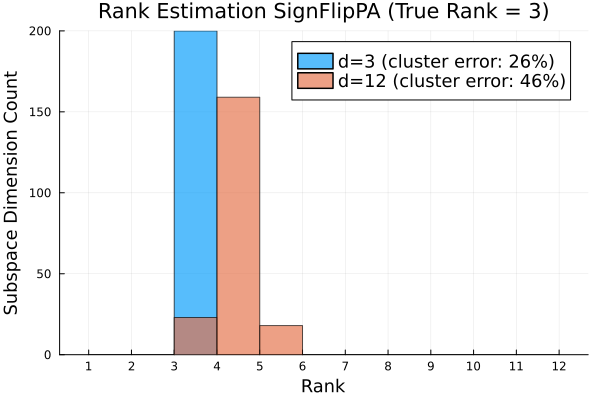

In [19]:
plot(title="Rank Estimation SignFlipPA (True Rank = 3)", xlabel="Rank", ylabel="Subspace Dimension Count",guidefont = 12, legendfontsize=12)
histogram!(vec(round.(Int,rankMatrixTrue)), bins=1:1:12, xticks=1:1:12, label="d=3 (cluster error: $errorTrue%)", alpha=0.66)
histogram!(vec(round.(Int,rankMatrix)), bins=1:1:12, xticks=1:1:12, label="d=12 (cluster error: $errorEstimate%)", alpha=0.66)
#savefig("plot1.pdf")

In [20]:
#ekssTensor = zeros(trials)
rankMatrix = zeros(2,trials)
alpcahTensor = zeros(trials)
rankMatrixTrue = zeros(2,trials)
alpcahTensorTrue = zeros(trials)
#oracleTensor = zeros(trials)

count = 1
for k = 1:trials
    # other parameters
    ν2 = varianceRatio*ν1
    badPoints = round(Int, pointRatio*goodPoints)
    # subspace generation
    U1 = generateSubspace(D, d; seed=seedVector1[count]) 
    U2 = generateSubspace(D, d; seed=seedVector2[count])
    # data generation
    X1 = generateData(U1, [ν1,ν2], [goodPoints,badPoints]; seed=seedVector3[count])
    X2 = generateData(U2, [ν1,ν2], [goodPoints,badPoints]; seed=seedVector4[count])
    # complete data matrix
    X = hcat(X1,X2);
    # cluster assignments
    C1 = vec([1*ones(size(X1)[2],1); 2*ones(size(X2)[2],1)]);
    C2 = vec([2*ones(size(X1)[2],1); 1*ones(size(X2)[2],1)]);
    # # ekss trial
    # estimatedCluster = ALPCAHUS(X,K, d; B=1, q=qValue, T=100, subspaceMethod=:pca, finalStep=false)
    # ekssTensor[k] = clusterError(estimatedCluster, C1, C2)
    # alpcahus trail
    C = ALPCAHUS(X,K, [4,4]; B=1, q=qValue, T=100, alpcahIter=20, subspaceMethod=:alpcah, finalStep=true) 
    rankMatrix[1,k] = flippa(X[:,C .== 1]; quantile=0.9, trials=100)
    rankMatrix[2,k] = flippa(X[:,C .== 2]; quantile=0.9, trials=100)
    alpcahTensor[k] = clusterError(C1, C)

    C = ALPCAHUS(X,K, [d,d]; B=1, q=qValue, T=100, alpcahIter=20, subspaceMethod=:alpcah, finalStep=true) 
    rankMatrixTrue[1,k] = flippa(X[:,C .== 1]; quantile=0.9, trials=100)
    rankMatrixTrue[2,k] = flippa(X[:,C .== 2]; quantile=0.9, trials=100)
    alpcahTensorTrue[k] = clusterError(C1, C)
    #alpcahTensor[k] = clusterError(estimatedCluster, C1, C2)
    # # noisy oracle trial       
    # noisyU1 = svd(X1[:,1:goodPoints]).U[:,1:d]
    # noisyU2 = svd(X2[:,1:goodPoints]).U[:,1:d]
    # estimatedCluster = 1 .+ Vector{Int8}(norm.(eachcol(noisyU1'*X)) .> norm.(eachcol(noisyU2'*X)));
    # oracleTensor[k] = clusterError(estimatedCluster, C1, C2)
    # increase count
    #count = count + 1
end

#save("trialData.jld", "ekss", ekssTensor, "alpcah", alpcahTensor, "oracle", oracleTensor);

In [21]:
errorEstimate = round(Int,mean(alpcahTensor))
errorTrue = round(Int,mean(alpcahTensorTrue));

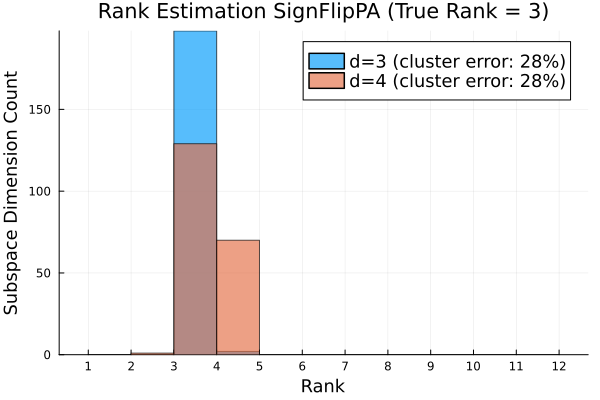

In [24]:
plot(title="Rank Estimation SignFlipPA (True Rank = 3)", xlabel="Rank", ylabel="Subspace Dimension Count",guidefont = 12, legendfontsize=12)
histogram!(vec(round.(Int,rankMatrixTrue)), bins=1:1:12, xticks=1:1:12, label="d=3 (cluster error: $errorTrue%)", alpha=0.66)
histogram!(vec(round.(Int,rankMatrix)), bins=1:1:12, xticks=1:1:12, label="d=4 (cluster error: $errorEstimate%)", alpha=0.66)
#savefig("plot2.pdf")

In [25]:
#ekssTensor = zeros(trials)
rankMatrix = zeros(2,trials)
alpcahTensor = zeros(trials)
rankMatrixTrue = zeros(2,trials)
alpcahTensorTrue = zeros(trials)
#oracleTensor = zeros(trials)

count = 1
for k = 1:trials
    # other parameters
    ν2 = varianceRatio*ν1
    badPoints = round(Int, pointRatio*goodPoints)
    # subspace generation
    U1 = generateSubspace(D, d; seed=seedVector1[count]) 
    U2 = generateSubspace(D, d; seed=seedVector2[count])
    # data generation
    X1 = generateData(U1, [ν1,ν2], [goodPoints,badPoints]; seed=seedVector3[count])
    X2 = generateData(U2, [ν1,ν2], [goodPoints,badPoints]; seed=seedVector4[count])
    # complete data matrix
    X = hcat(X1,X2);
    # cluster assignments
    C1 = vec([1*ones(size(X1)[2],1); 2*ones(size(X2)[2],1)]);
    C2 = vec([2*ones(size(X1)[2],1); 1*ones(size(X2)[2],1)]);
    # # ekss trial
    # estimatedCluster = ALPCAHUS(X,K, d; B=1, q=qValue, T=100, subspaceMethod=:pca, finalStep=false)
    # ekssTensor[k] = clusterError(estimatedCluster, C1, C2)
    # alpcahus trail
    C = ALPCAHUS(X,K, [12,12]; B=1, q=qValue, T=100, alpcahIter=20, subspaceMethod=:alpcah, finalStep=true, adaptiveRank=true, quantileAmount=0.9) 
    rankMatrix[1,k] = flippa(X[:,C .== 1]; quantile=0.9, trials=100)
    rankMatrix[2,k] = flippa(X[:,C .== 2]; quantile=0.9, trials=100)
    alpcahTensor[k] = clusterError(C1, C)

    C = ALPCAHUS(X,K, [d,d]; B=1, q=qValue, T=100, alpcahIter=20, subspaceMethod=:alpcah, finalStep=true, adaptiveRank=false, quantileAmount=0.9) 
    rankMatrixTrue[1,k] = flippa(X[:,C .== 1]; quantile=0.9, trials=100)
    rankMatrixTrue[2,k] = flippa(X[:,C .== 2]; quantile=0.9, trials=100)
    alpcahTensorTrue[k] = clusterError(C1, C)
    #alpcahTensor[k] = clusterError(estimatedCluster, C1, C2)
    # # noisy oracle trial       
    # noisyU1 = svd(X1[:,1:goodPoints]).U[:,1:d]
    # noisyU2 = svd(X2[:,1:goodPoints]).U[:,1:d]
    # estimatedCluster = 1 .+ Vector{Int8}(norm.(eachcol(noisyU1'*X)) .> norm.(eachcol(noisyU2'*X)));
    # oracleTensor[k] = clusterError(estimatedCluster, C1, C2)
    # increase count
    #count = count + 1
end

#save("trialData.jld", "ekss", ekssTensor, "alpcah", alpcahTensor, "oracle", oracleTensor);

In [26]:
errorEstimate = round(Int,mean(alpcahTensor))
errorTrue = round(Int,mean(alpcahTensorTrue));

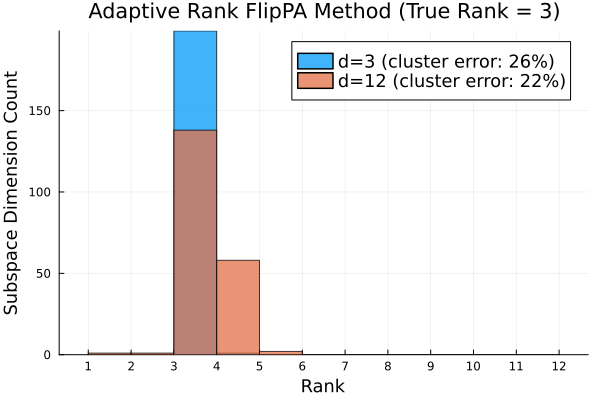

In [29]:
plot(title="Adaptive Rank FlipPA Method (True Rank = 3)", xlabel="Rank", ylabel="Subspace Dimension Count",guidefont = 12, legendfontsize=12)
histogram!(vec(round.(Int,rankMatrixTrue)), bins=1:1:12, xticks=1:1:12, label="d=3 (cluster error: $errorTrue%)", alpha=0.75)
histogram!(vec(round.(Int,rankMatrix)), bins=1:1:12, xticks=1:1:12, label="d=12 (cluster error: $errorEstimate%)", alpha=0.75)
#savefig("plot3.pdf")